In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Description :

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

| Variable | Description|
| :------- | :------: | 
| longitude | longitude of house | 
| latitude | longitude of house | 
| housing_median_age | Age of housing complex |
| total_rooms | total rooms present |
| total_bedrooms | total bedrooms present |
| population | population lived |
| households | no of households |
| median_house_value | House price |
| ocean_proximity | Distance from Ocean bank |

#### Target Variable:
Target Variable: median_house_value

In [2]:
data = pd.read_csv('california_housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.drop_duplicates().count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [6]:
data.isnull().sum()[data.isnull().sum()>0]

total_bedrooms    207
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [8]:
#We have only one Categorical variable "ocean_proximity"
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
#As we have multiple categories, we can go with labeencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["ocean_proximity"] = le.fit_transform(data["ocean_proximity"])

In [10]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [11]:
#Now we have all numerical data
#We will go ahead with imputation of null values with "simpleimputer"
#We will treat null values first
from sklearn.impute import SimpleImputer
# Initialize the imputer with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to the column and transform it
data["total_bedrooms"] = imputer.fit_transform(data[['total_bedrooms']]) # we have fillna() as well, to fill data

In [13]:
data.total_bedrooms.isnull().sum()>0

np.False_

In [14]:
"""total_rooms, housing_median_age, total_bedrooms,population, households, can not be float values, we 
will convert them to numerical from floating value"""
data['total_rooms'] = data.total_rooms.astype(int)
data['housing_median_age'] = data.housing_median_age.astype(int)
data['total_bedrooms'] = data.total_bedrooms.astype(int)
data['population'] = data.population.astype(int)
data['households'] = data.households.astype(int)

In [15]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600.0,3
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500.0,3
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100.0,3
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300.0,3
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200.0,3


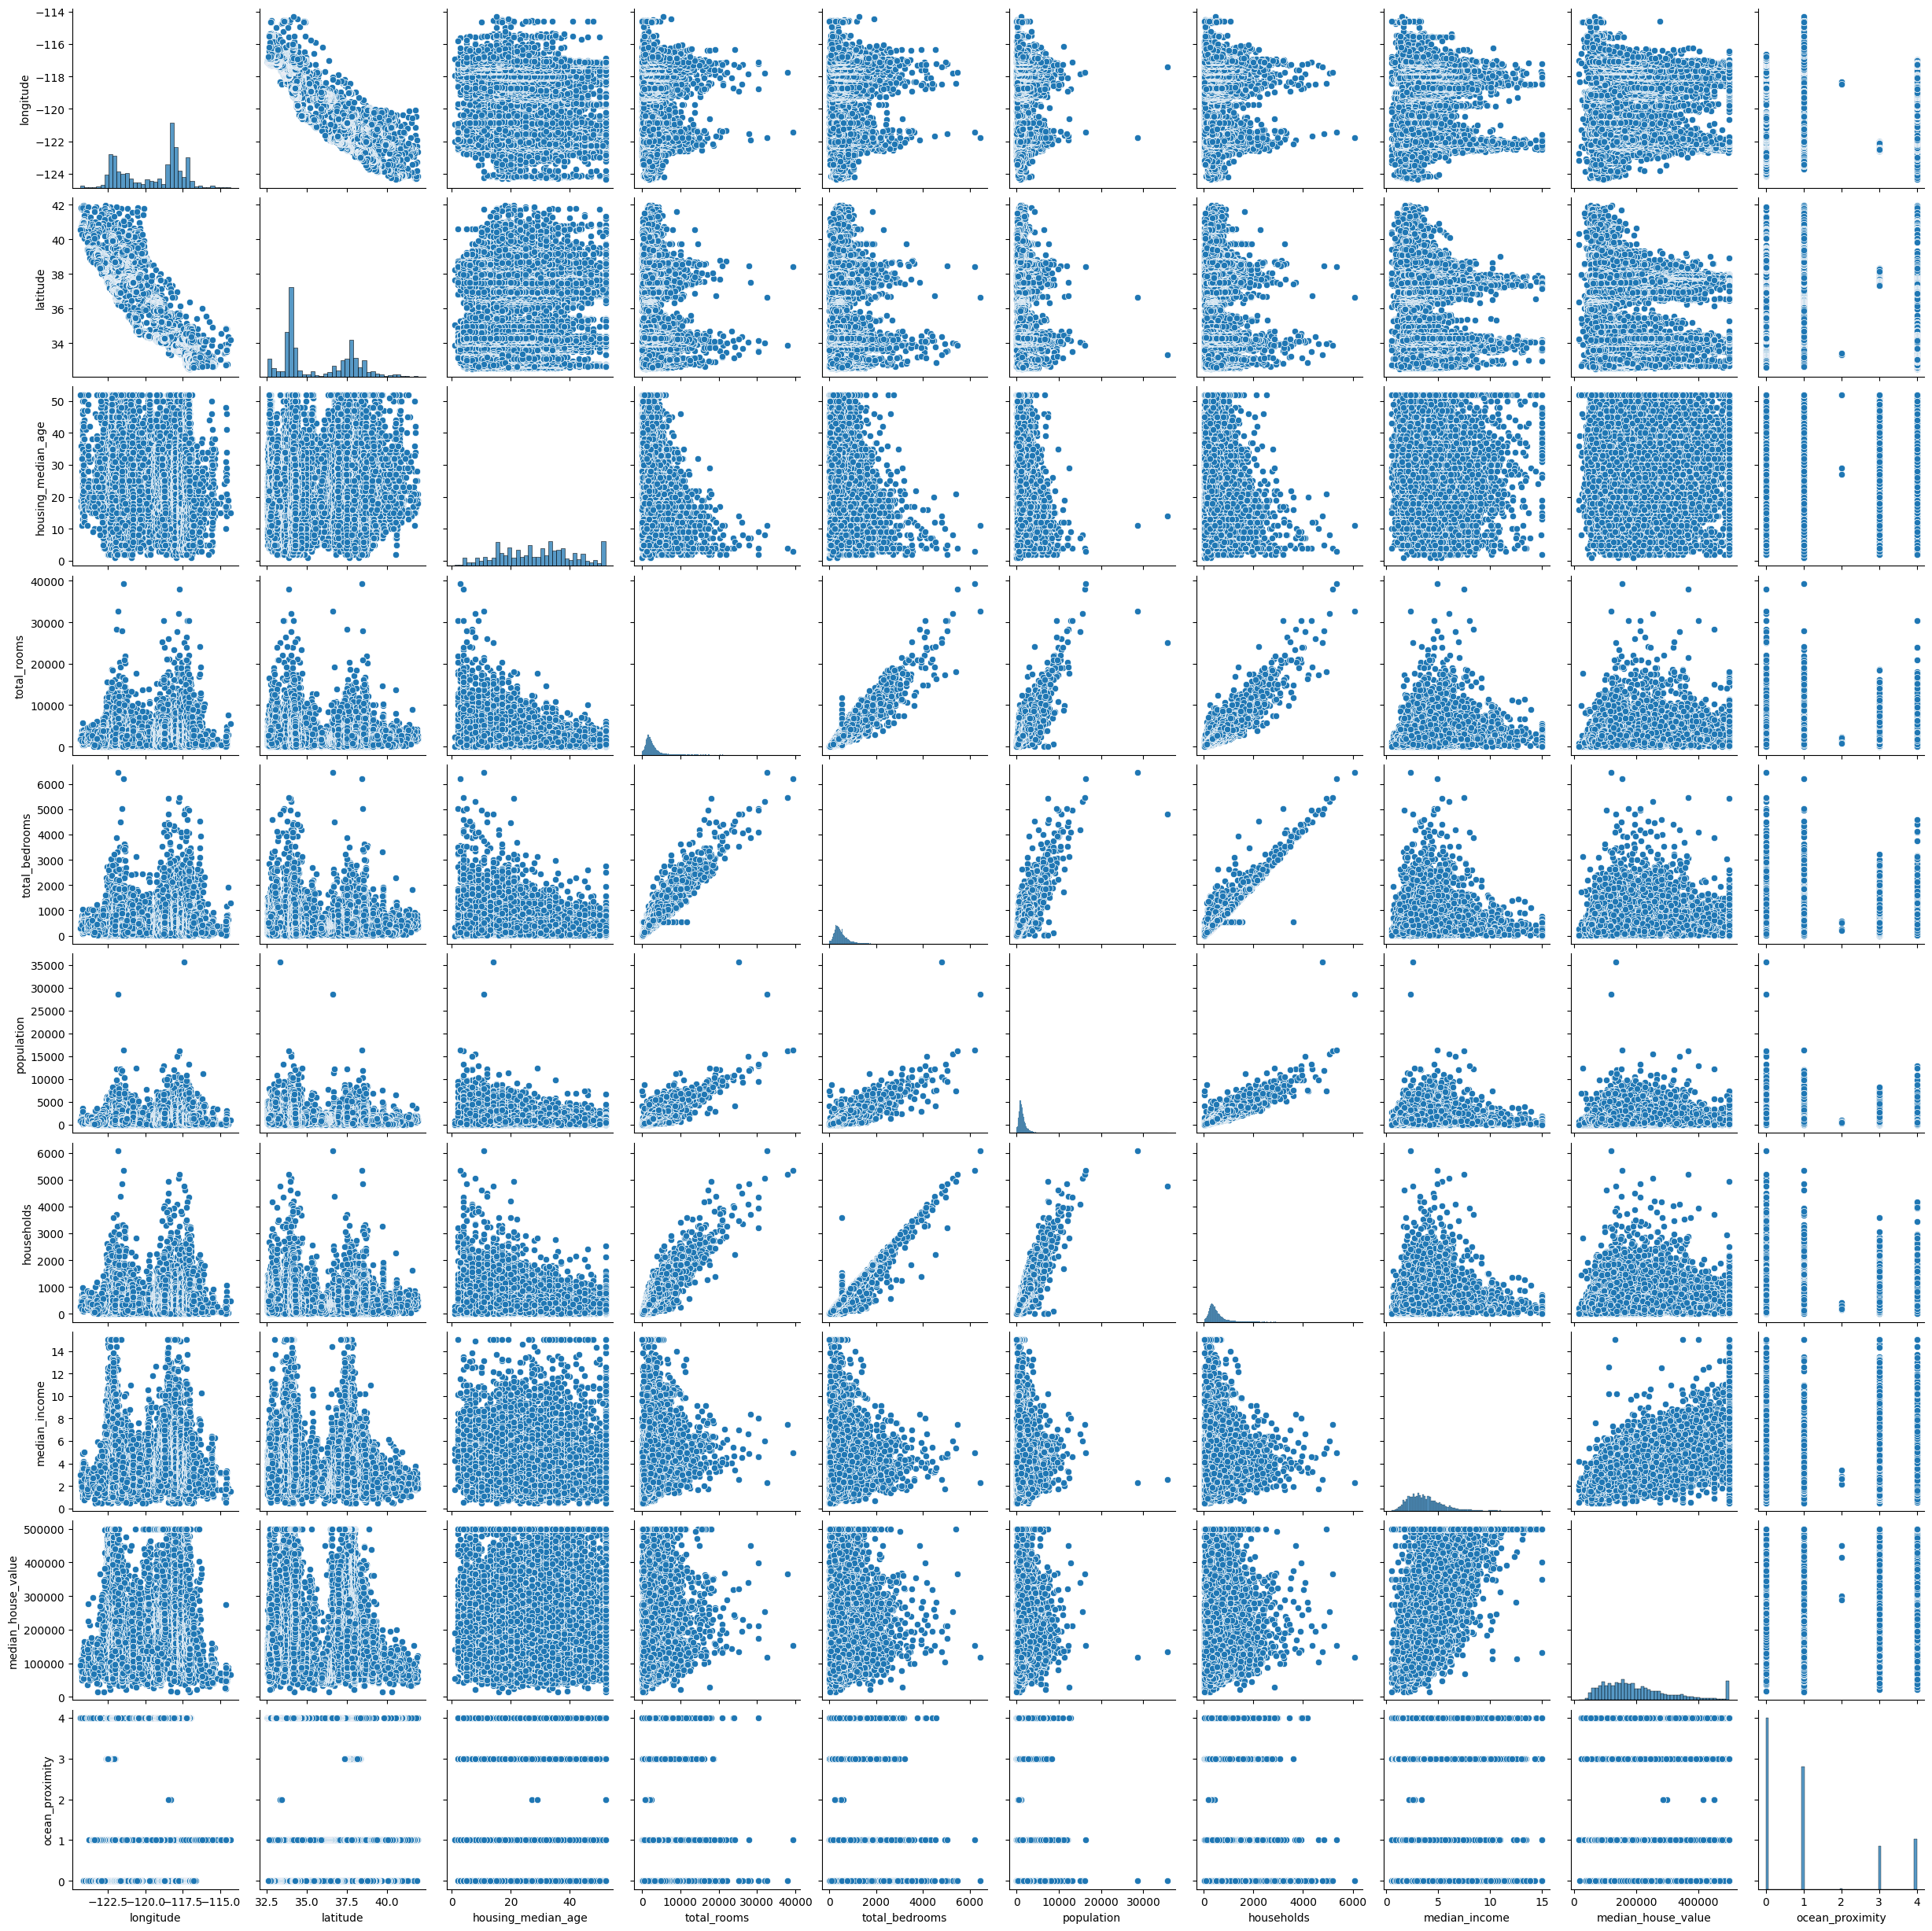

In [16]:
sns.pairplot(data=data)

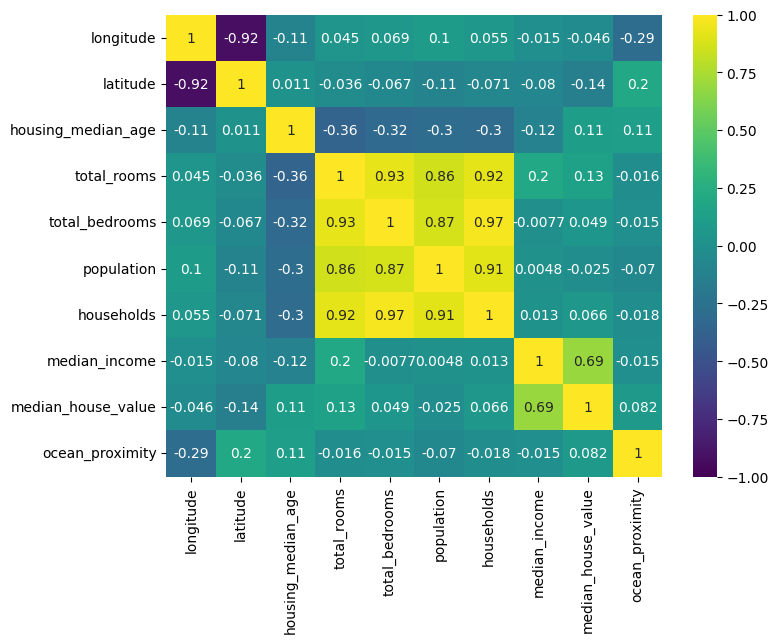

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, vmin=-1, cmap='viridis')
plt.show()

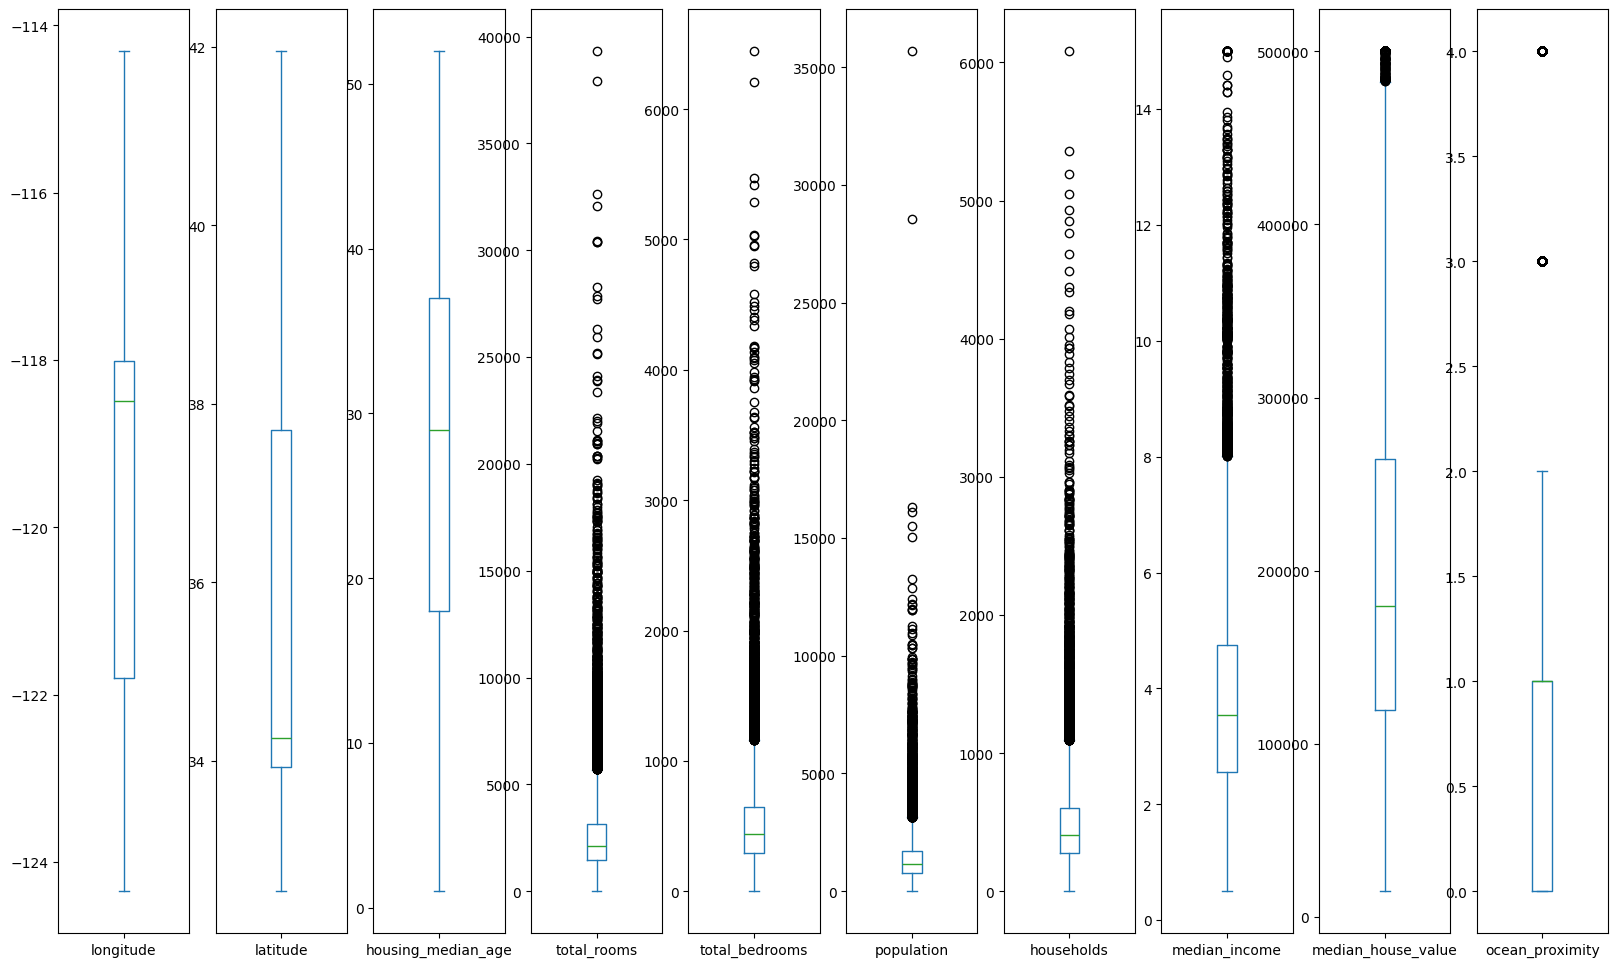

In [54]:
#From above heatmap we observed that, we have very strong and weak or negetaive co-relation with variables on target variable.
#We will check the relation between all variables using plots
data.plot(kind="box",subplots=True,figsize=(20,12))
plt.show()

In [19]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

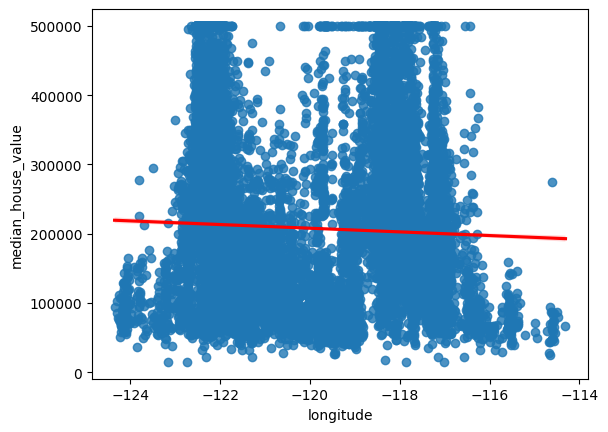

In [20]:
sns.regplot(x="longitude",
            y="median_house_value",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

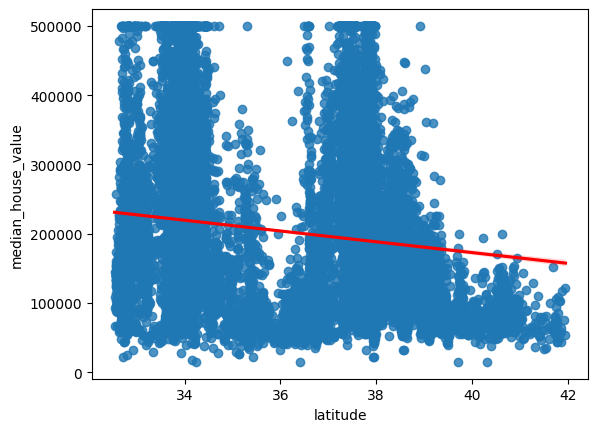

In [21]:
sns.regplot(x="latitude",
            y="median_house_value",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

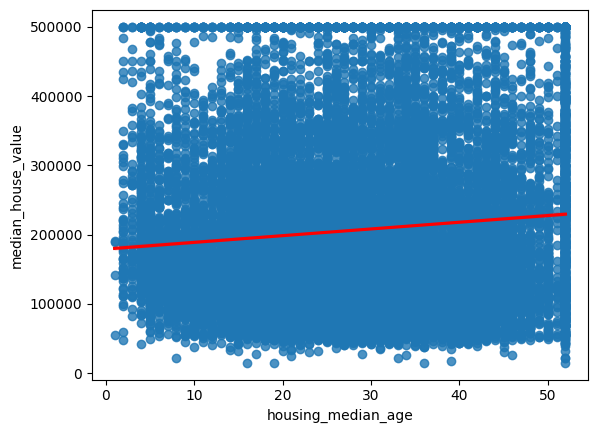

In [58]:
sns.regplot(x="housing_median_age",
            y="median_house_value",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

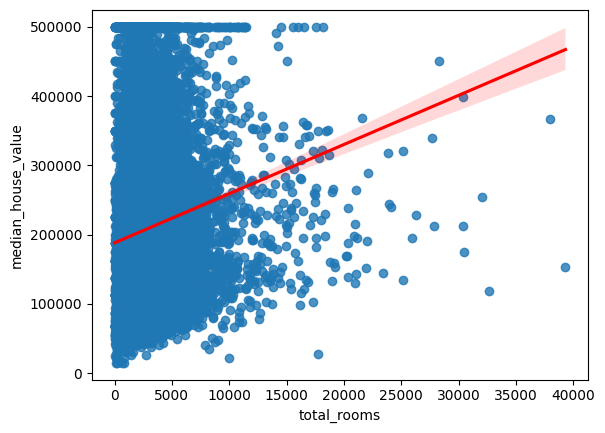

In [63]:
sns.regplot(x="total_rooms",
            y="median_house_value",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

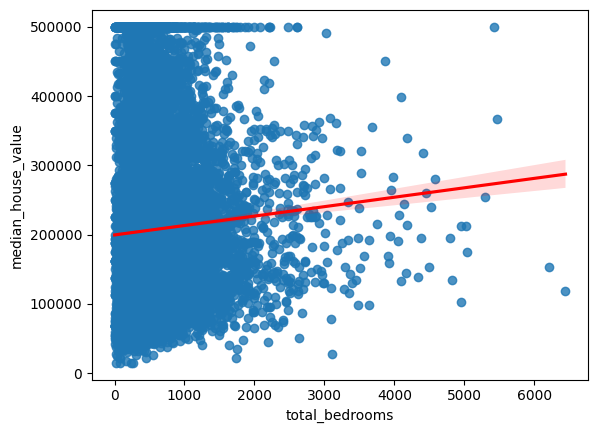

In [64]:
sns.regplot(x="total_bedrooms",
            y="median_house_value",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

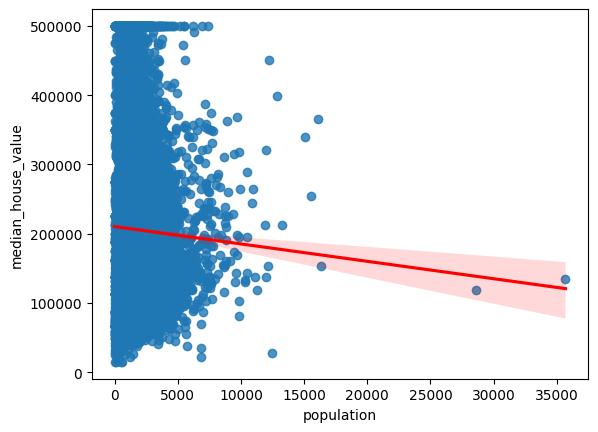

In [65]:
sns.regplot(x="population",
            y="median_house_value",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

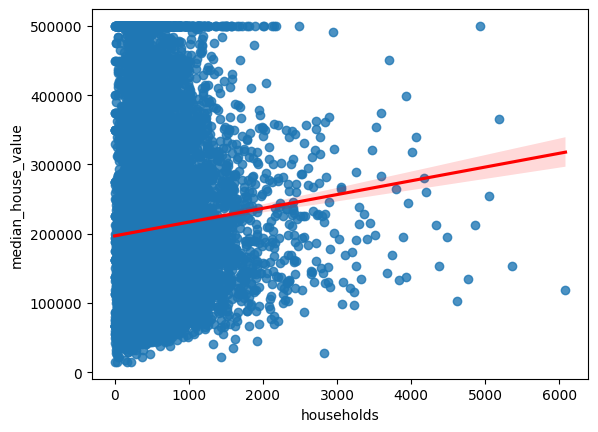

In [66]:
sns.regplot(x="households",
            y="median_house_value",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

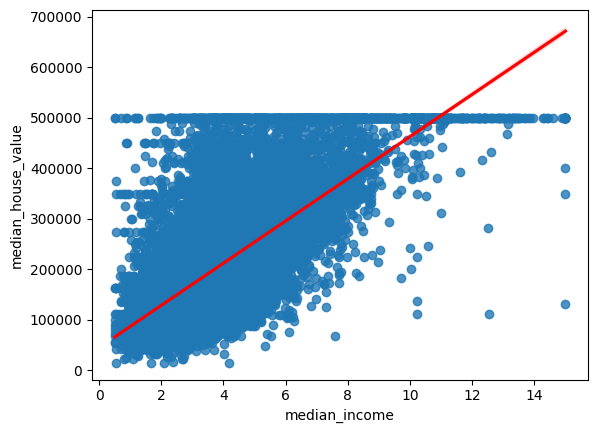

In [67]:
sns.regplot(x="median_income",
            y="median_house_value",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

In [22]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600.0,3
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500.0,3
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100.0,3
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300.0,3
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200.0,3


#### It’s the Bayesian version of Ridge Regression (L2 regularization).
##### Assumes that model weights come from a Gaussian prior:
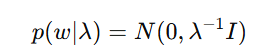
##### This leads to smaller but non-zero weights, encouraging smoothness rather than sparsity.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
# Feature (X) and target vector (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [28]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [29]:
# Initialize Bayesian Ridge model
model = BayesianRidge()

In [30]:
# Train the model
model.fit(X_train, y_train)

,max_iter,300
,tol,0.001
,alpha_1,1e-06
,alpha_2,1e-06
,lambda_1,1e-06
,lambda_2,1e-06
,alpha_init,None
,lambda_init,None
,compute_score,False
,fit_intercept,True
,copy_X,True


In [31]:
# Predict on test data
y_mean, y_std = model.predict(X_test, return_std=True)

In [43]:
y_pred = model.predict(X_test)

In [32]:
X_test.shape

(4128, 9)

In [34]:
y_mean.shape

(4128,)

In [35]:
y_std.shape

(4128,)

In [33]:
print("Predicted Values:", y_mean[:5])
print("Prediction Uncertainty (y_std):", y_std[:5])

Predicted Values: [ 75562.58680356 166295.48793283 264697.75033901 275614.7721721
 278079.24931333]
Prediction Uncertainty (y_std): 20046    100171.283930
3024     100658.042285
15663    100421.530148
20484    100699.812327
9814     101142.603140
dtype: float64


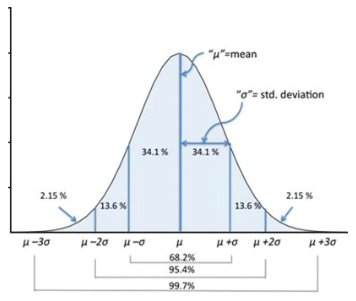

In [44]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n BAYESIAN RIDGE REGRESSION RESULTS")
print(f" Mean Absolute Error (MAE): {mae:.3f}")
print(f" Mean Squared Error (MSE): {mse:.3f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f" R² Score: {r2:.3f}")

print("\n Model Parameters:")
print(f"Intercept: {model.intercept_:.3f}")
print("Total Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"   {feature}: {coef:.4f}")


 BAYESIAN RIDGE REGRESSION RESULTS
 Mean Absolute Error (MAE): 51844.382
 Mean Squared Error (MSE): 5054739142.261
 Root Mean Squared Error (RMSE): 71096.689
 R² Score: 0.614

 Model Parameters:
Intercept: -3587278.426
Total Coefficients:
   longitude: -42722.3104
   latitude: -42487.4909
   housing_median_age: 1185.4947
   total_rooms: -8.1455
   total_bedrooms: 116.2762
   population: -38.5956
   households: 46.3941
   median_income: 40516.9871
   ocean_proximity: -308.5369


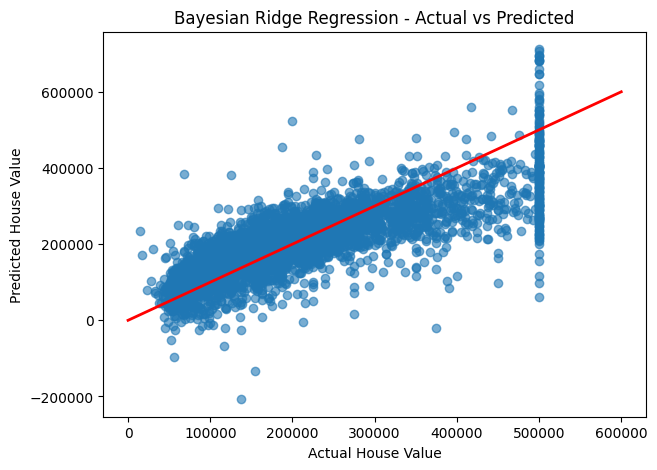

In [49]:
# Visualization
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 600000], [0, 600000], color='red', lw=2)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Bayesian Ridge Regression - Actual vs Predicted")
plt.show()

In [ ]:
#The model estimates mean prediction and uncertainty (y_std) for each prediction.
#Metrics include MAE, MSE, RMSE, R² for interpretability.
#Bayesian Ridge applies an L2 regularization under the hood via Gaussian priors.